# Использование линейной регрессии

На первый взгляд результаты использования моделей линейной регрессии, могут показаться сложными. Однако понимание такого типа данных является важным этапом на пути к созданию более сложных моделей. Внизу приведен простой пример, в котором по шагам объясняется вывод. Мы будем использовать Python для изучения показателей соответствия линейной регрессии, таких как коэффициент детерминации (R2), проверка гипотез (F, T, Omnibus) и другие показатели.

Пример: Табак и алкоголь в Великобритании

Давайте начнем с использования небольшого набора данных из библиотеки DECAL, который исследует корреляцию между покупками табака и алкоголя в различных регионах Соединенного Королевства. Мы будем анализировать данные с помощью двух инструментов для расчета линейной регрессии: модулей statsmodels и sklearn. Мы также воспользуемся библиотеками pandas для работы с данными и matplotlib для создания графиков. Давай импортируем нужные модули, загрузим данные в Python и изучим их внимательно.

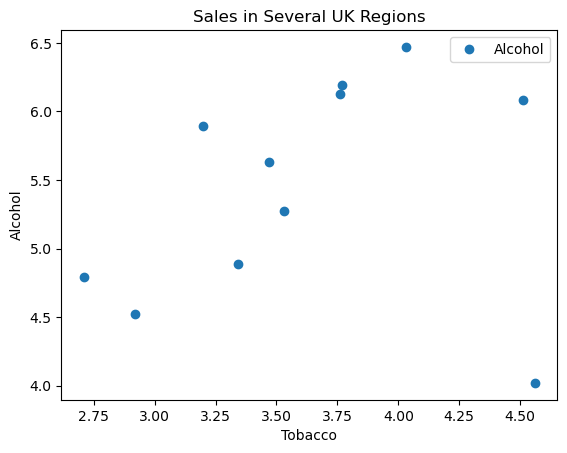

In [17]:
In [1]: import numpy as np
...: import pandas as pd
...: import matplotlib as mpl
...: import matplotlib.pyplot as plt
...: import statsmodels.formula.api as sm
...: from sklearn.linear_model import LinearRegression
...: from scipy import stats
...:
In [2]: data_str = '''Region Alcohol Tobacco
...: North 6.47 4.03
...: Yorkshire 6.13 3.76
...: Northeast 6.19 3.77
...: East_Midlands 4.89 3.34
...: West_Midlands 5.63 3.47
...: East_Anglia 4.52 2.92
...: Southeast 5.89 3.20
...: Southwest 4.79 2.71
...: Wales 5.27 3.53
...: Scotland 6.08 4.51
...: Northern_Ireland 4.02 4.56'''
...:
...: # Read in the data. Note that for Python 2.x,
...: # you have to change the "import" statement
...: from io import StringIO
...: df = pd.read_csv(StringIO(data_str), sep=r'\s+')
...:
In [3]: # Plot the data
...: df.plot('Tobacco', 'Alcohol', style='o')
...: plt.ylabel('Alcohol')
...: plt.title('Sales in Several UK Regions')
...: plt.show()
...:


Соотношение продаж алкоголя и табака в Великобритании. Мы замечаем, что, по-видимому, наблюдается линейная тенденция
и один выброс, который соответствует Северной Ирландии.

После этого очень просто настроить модель, оставив на данный момент выброс (который является последней точкой данных) в стороне - 

In [21]:
In [4]: result = sm.ols('Alcohol ~ Tobacco', df[:-1]).fit()
...: print(result.summary())
...: # Примечание: при использовании модуля formula.api из statsmodels автоматически добавляется таблица данных.

                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.78
Date:                Fri, 31 May 2024   Prob (F-statistic):            0.00723
Time:                        19:36:22   Log-Likelihood:                -4.9998
No. Observations:                  10   AIC:                             14.00
Df Residuals:                       8   BIC:                             14.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0412      1.001      2.038      0.0

E:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


И вот у нас есть очень хорошая таблица чисел, которая сначала может показаться довольно сложной. Чтобы они означают? Левый столбец первой таблицы в основном сам по себе понятен. Степени свободы (Df) модели — это количество предикторов или объяснительных переменных. Df остатков — это количество наблюдений минус степени свободы модели, минус один (для смещения). Большинство значений, перечисленных в сводке, можно получить через объект результата. Например, значение R2 можно получить с помощью result.rsquared. Если вы используете IPython, вы можете ввести result. и нажать TAB, чтобы увидеть список всех возможных атрибутов для объекта результата.


## ОПРЕДЕЛЕНИЕ РЕГРЕССИИ С ПЕРЕХВАТОМ

Переменные суммы квадратов SSxx уже были определены, n - количество наблюдений, а k - количество параметров регрессии.
Например, если вы вписываете прямую линию, kd 2 вы укажете значения модели, соответствующие заданным параметрам, а yN - среднее значение. В дополнение к этому, следующие переменные - 
• * DF mod D k 1 - это (скорректированные) степени свободы модели. (“1” означает, что нас интересует только корреляция, а не абсолютное смещение данных.)
• * Адрес dnk - это остаточные степени свободы
• DFtot dn1 - это (скорректированные) Суммарные степени свободы. Регрессия по горизонтальной линии - это модель с нулевой гипотезой.
Для моделей множественной регрессии с перехватом, DF modc - это новый DFtot.
• * Mcmod D SSmod=DFmod : среднее значение квадратов модели
• * MS res SS res=DF res : среднее значение квадратов остатков. MSres - это несмещенная оценка для 2 для моделей множественной регрессии.
• * Umstot D SStot=DFtot : Общее среднее квадратическое значение, которое является выборочной дисперсией y-переменной.
y-variable.

## ЗНАЧЕНИЯ R^2

Значение R^2 указывает на долю вариации y-переменной, которая обусловлена вариацией x-переменных. Для простой линейной регрессии значение R^2 равно квадрату выборочной корреляции rxy. Для множественной
линейной регрессии с перехватом (которая включает в себя простую линейную регрессию) значение R^2 определяется как-

![11.png](11.png)

## R^2 : СКОРРЕКТИРОВАННОЕ R:2

Для оценки качества моделей многие исследователи предпочитают скорректированное значение R^2, обычно обозначаемое столбиком над значением RN, которое применяется в качестве штрафа за наличие большого количества параметров в модели. Вот логика, лежащая в основе определения RN^2: R^2 определяется как R2D1 SSres=SStot или 1 R^2d SSres=SStot. Чтобы учесть количество параметров регрессии p, определите скорректированное значение R-квадрата как - 

![22.png](22.png)

![33.png](33.png)

## F - ТЕСТ

Для модели множественной регрессии с перехватом: 

![44.png](44.png)

Мы можем протестировать это непосредственно на Python с помощью - 

In [23]:
In [5]: N = result.nobs
...: k = result.df_model+1
...: dfm, dfe = k-1, N - k
...: F = result.mse_model / result.mse_resid
...: p = 1.0 - stats.f.cdf(F,dfm,dfe)
...: print('F-statistic: {:.3f}, p-value: {:.5f}'
...: .format( F, p ))
...:

F-statistic: 12.785, p-value: 0.00723


Здесь stats.f.cdf(F, m, n) возвращает совокупную сумму F-распределения с параметрами формы m = k-1 = 1 и n=N-k=8, вплоть до F-статистики F.
Вычитая эту величину из единицы, мы получаем вероятность в хвосте, которая представляет собой вероятность наблюдения F-статистики, более экстремальной, чем наблюдаемая.

## ЛОГАРИФМИЧЕСКАЯ ФУНКЦИЯ ПРАВДОПОДОПИЯ

В классической линейной регрессионной модели (с нормальными ошибками) мы стремимся максимизировать вероятность наблюдаемых данных при помощи метода максимального правдоподобия. В отличие от метода наименьших квадратов, где модель остаётся постоянной, а ошибки ответа изменчивы, в методе максимального правдоподобия концентрируемся на постоянных значениях ответов и стараемся максимизировать вероятность подобранных моделей.
Для классической модели линейной регрессии (с нормальной погрешностью) мы имеем - 


![55.png](55.png)

Функция логарифмического правдоподобия определяется как - 

![66.png](66.png)

Мы можем вычислить это в Python следующим образом:

In [24]:
In [6]: N = result.nobs
...: SSR = result.ssr
...: s2 = SSR / N
...: L = (1.0/np.sqrt(2*np.pi*s2)) ** N*np.exp(-SSR/(s2*2.0))
...: print('ln(L) =', np.log( L ))
...:

ln(L) = -4.999758697385978


##  Примеры

Линейная регрессия - это статистический метод, используемый для оценки связи между зависимой переменной (объясняемой) и одной или несколькими независимыми переменными (объясняющими). Целью линейной регрессии является построение линейной модели, которая наилучшим образом описывает отношения между переменными.

Формула для простой линейной регрессии (одна независимая переменная):
Уравнение линейной регрессии имеет вид: y = β0 + β1x + ε
где:
- y - зависимая переменная
- x - независимая переменная
- β0 - коэффициент сдвига (константа)
- β1 - коэффициент наклона (угловой коэффициент)
- ε - случайная ошибка

Формула для множественной линейной регрессии (несколько независимых переменных):
Уравнение множественной линейной регрессии имеет вид: y = β0 + β1x1 + β2x2 + ... + βnxn + ε
где:
- y - зависимая переменная
- x1, x2, ..., xn - независимые переменные
- β0 - коэффициент сдвига (константа)
- β1, β2, ..., βn - коэффициенты наклона для каждого независимого переменной
- ε - случайная ошибка

Цель обучения модели линейной регрессии заключается в подборе значений коэффициентов, чтобы минимизировать сумму квадратов ошибок между прогнозами модели и реальными значениями.

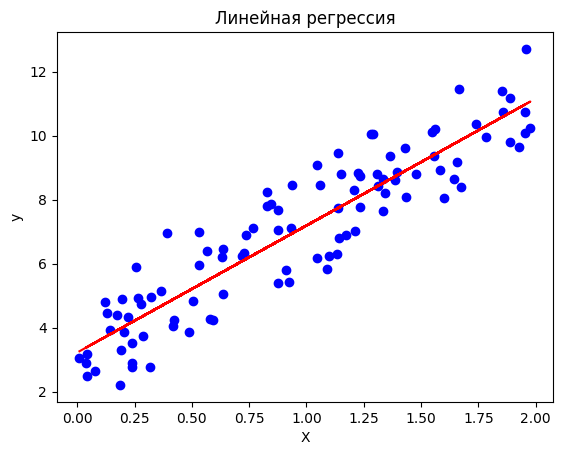

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Генерируем случайные данные для примера
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Предсказываем значения y на основе обученной модели
y_pred = model.predict(X)

# Строим график и отображаем исходные данные и линейную регрессию
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.show()

<iframe src="https://trinket.io/embed/python3/be32898321?outputOnly=true" width="100%" height="356" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>